In [1]:
library(data.table)
library(dplyr)
library(stringr)
library(ggplot2)


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:data.table’:

    between, first, last


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
variant <- fread("variant_with_maf_new.csv")
head(variant)
dim(variant)

Identifier,sampleID,frequency,dbSNP id (g),Gene name (d),Entrez gene id (e),Chromosome (f),Start (f),End (f),Cytoband (f),AA Impact (h),1000 Genome (i),ESP5400 (j),SIFT Score (k),SNP Type (l),Polyphen (m),Variant class (n),AF,rare
<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<lgl>
chr10:100010849_G_A,ME:SK-MEL-2,45.238,-,LOXL4,84171,10,100010849,100010849,10q24,R725W,0.00,0.00000,0.00,Missense,1,Type 2,0.00002,TRUE
chr10:100013418_T_G,ME:SK-MEL-2,56.140,rs148260647,LOXL4,84171,10,100013418,100013418,10q24,Y576S,0.00,0.00019,0.32,Missense,1,Type 1,0.00040,TRUE
chr10:100017453_T_G,BR:MCF7,64.151,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,0.39000,FALSE
chr10:100017453_T_G,BR:MDA-MB-231,28.571,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,0.39000,FALSE
chr10:100017453_T_G,BR:HS 578T,100.000,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,0.39000,FALSE
chr10:100017453_T_G,CNS:U251,27.273,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,0.39000,FALSE


[1] 352827     19

In [3]:
variant$sampleID <- variant$sampleID %>%
  strsplit( ":")  %>%
  sapply( tail, 1 ) %>%
  str_replace_all("-","")%>%
  str_replace_all(" ","")%>%
  str_replace("(TB)","")%>%
  str_replace("UO31","U031")%>%
  str_replace_all('\\(|\\)', "")%>%
  str_replace_all("A549/ATCC","A549")%>%
  str_replace_all("7860","X786O")%>%
  str_replace_all("MDAN","MDAMB468")%>%
  str_replace_all("NCI/ADRRES","NCIADRES")

In [4]:
head(variant)

Identifier,sampleID,frequency,dbSNP id (g),Gene name (d),Entrez gene id (e),Chromosome (f),Start (f),End (f),Cytoband (f),AA Impact (h),1000 Genome (i),ESP5400 (j),SIFT Score (k),SNP Type (l),Polyphen (m),Variant class (n),AF,rare
<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<lgl>
chr10:100010849_G_A,SKMEL2,45.238,-,LOXL4,84171,10,100010849,100010849,10q24,R725W,0.00,0.00000,0.00,Missense,1,Type 2,0.00002,TRUE
chr10:100013418_T_G,SKMEL2,56.140,rs148260647,LOXL4,84171,10,100013418,100013418,10q24,Y576S,0.00,0.00019,0.32,Missense,1,Type 1,0.00040,TRUE
chr10:100017453_T_G,MCF7,64.151,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,0.39000,FALSE
chr10:100017453_T_G,MDAMB231,28.571,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,0.39000,FALSE
chr10:100017453_T_G,HS578T,100.000,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,0.39000,FALSE
chr10:100017453_T_G,U251,27.273,rs1983864,LOXL4,84171,10,100017453,100017453,10q24,D405A,0.36,0.24900,0.00,Missense,1,Type 1,0.39000,FALSE


In [5]:
variant <- variant[,c(1,2,5)]
colnames(variant)[3] <- "geneID"
head(variant)

Identifier,sampleID,geneID
<chr>,<chr>,<chr>
chr10:100010849_G_A,SKMEL2,LOXL4
chr10:100013418_T_G,SKMEL2,LOXL4
chr10:100017453_T_G,MCF7,LOXL4
chr10:100017453_T_G,MDAMB231,LOXL4
chr10:100017453_T_G,HS578T,LOXL4
chr10:100017453_T_G,U251,LOXL4


In [6]:
training <- fread("outrider_res.txt")
training <- training[,-1]
features <- unique(training$featureID)
length(features)

Warning message in fread("outrider_res.txt"):
“Detected 19 column names but the data has 20 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 6975

In [7]:
head(training[is.na(training$pValue),])

featureID,sampleID,pValue,padjust,zScore,fc,log2fc,input_value,preprocessed_raw,preprocessed_expected,normalized,meanCorrected,sd,sizefactor,pvalDistribution,aberrant,AberrantBySample,AberrantByFeature,padj_rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<int>,<int>,<dbl>
A2RTX5;A2RTX5-2,X786O_NCI60,NA,NA,NA,NA,NA,NA,NA,NA,NA,23.85,1.59,0.98,gaussian,NA,0,0,6489
A6ND36;A6ND36-2,X786O_NCI60,NA,NA,NA,NA,NA,NA,NA,NA,NA,25.08,1.81,0.98,gaussian,NA,0,0,6490
A8K2U0;A8K2U0-2,X786O_NCI60,NA,NA,NA,NA,NA,NA,NA,NA,NA,25.17,1.03,0.98,gaussian,NA,0,0,6491
B1AK53;B1AK53-2,X786O_NCI60,NA,NA,NA,NA,NA,NA,NA,NA,NA,26.43,1.34,0.98,gaussian,NA,0,0,6492
CON__A2A4G1,X786O_NCI60,NA,NA,NA,NA,NA,NA,NA,NA,NA,22.91,0.75,0.98,gaussian,NA,0,0,6493
CON__ENSEMBL:ENSBTAP00000038329,X786O_NCI60,NA,NA,NA,NA,NA,NA,NA,NA,NA,26.61,1.50,0.98,gaussian,NA,0,0,6494


In [8]:
prot <- fread("proteinGroups.txt")
prot <- prot[,c(1,7)]
colnames(prot)[1] <- 'featureID'
prot$geneID <- lapply(prot$`Gene names`, function(x){
    strsplit(x,";")[[1]][1]
})
prot$geneID <- as.character(prot$geneID)
prot <- prot[prot$featureID %in% features, ]
nrow(prot)
head(prot)

[1] 6975

featureID,Gene names,geneID
<chr>,<chr>,<chr>
P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37,PPIAL4E;PPIAL4A;PPIAL4D;PPIAL4C,PPIAL4E
A0AV96;A0AV96-2,RBM47,RBM47
A0AVF1;A0AVF1-2;A0AVF1-3,TTC26,TTC26
A0AVT1;A0AVT1-2;A0AVT1-3;A0AVT1-4,UBA6,UBA6
A0FGR8-6;A0FGR8,ESYT2,ESYT2
A0JLT2;A0JLT2-2,MED19,MED19


In [9]:
variant_prot <- merge(variant, prot[,-2])
head(variant_prot)
nrow(variant_prot)

geneID,Identifier,sampleID,featureID
<chr>,<chr>,<chr>,<chr>
A2ML1,chr12:8976409_C_A,HCC2998,A8K2U0;A8K2U0-2
A2ML1,chr12:8988109_A_C,HCC2998,A8K2U0;A8K2U0-2
A2ML1,chr12:8990937_C_A,LOXIMVI,A8K2U0;A8K2U0-2
A2ML1,chr12:8991708_G_T,EKVX,A8K2U0;A8K2U0-2
A2ML1,chr12:9000230_C_T,HCC2998,A8K2U0;A8K2U0-2
A2ML1,chr12:9001419_T_C,RPMI8226,A8K2U0;A8K2U0-2


[1] 112787

In [10]:
prot_samp_withRare <- variant_prot[,-c(1:2)]
prot_samp_withRare <- prot_samp_withRare[!duplicated(prot_samp_withRare),]
prot_samp_withRare$rare <- 1
head(prot_samp_withRare)
nrow(prot_samp_withRare)

sampleID,featureID,rare
<chr>,<chr>,<dbl>
HCC2998,A8K2U0;A8K2U0-2,1
LOXIMVI,A8K2U0;A8K2U0-2,1
EKVX,A8K2U0;A8K2U0-2,1
RPMI8226,A8K2U0;A8K2U0-2,1
MCF7,A8K2U0;A8K2U0-2,1
MDAMB231,A8K2U0;A8K2U0-2,1


[1] 73212

In [11]:
training$sampleID <- gsub('_NCI60','',training$sampleID)
training <- training[!is.na(training$pValue),] # only underexpressed
overexpressed <- training[training$log2fc>0,1:2]

training <- training[training$log2fc<0,] # only underexpressed
nrow(training)
head(training)

[1] 165276

featureID,sampleID,pValue,padjust,zScore,fc,log2fc,input_value,preprocessed_raw,preprocessed_expected,normalized,meanCorrected,sd,sizefactor,pvalDistribution,aberrant,AberrantBySample,AberrantByFeature,padj_rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<int>,<int>,<dbl>
P98175-2;P98175,SN12C,3.582025e-10,2.244320e-05,-6.27,0.85,-0.24,17657000,24.07,28.43,25.35,29.93,0.94,1.00,gaussian,TRUE,4,1,1.0
Q96JM3,DU145,4.589631e-10,2.898043e-05,-6.23,0.81,-0.30,7064000,22.75,27.93,23.55,28.91,1.12,0.99,gaussian,TRUE,7,1,1.0
P78347-2;P78347-4;P78347-3;P78347;P78347-5;Q86UP8-4;Q86UP8-2;Q6EKJ0-2;Q86UP8-5,HCT15,1.240254e-09,7.842967e-05,-6.08,0.82,-0.29,50830000,25.60,31.20,25.97,31.66,1.09,1.02,gaussian,TRUE,8,1,1.0
Q16778;P06899,HL60,2.462365e-09,1.544331e-04,-5.96,0.88,-0.18,241780000,27.85,31.50,28.70,32.45,0.85,1.00,gaussian,TRUE,6,1,1.0
Q9Y263,SKMEL5,2.647038e-09,1.652732e-04,-5.95,0.75,-0.41,1864200,20.83,27.64,22.93,30.43,1.41,1.01,gaussian,TRUE,2,1,1.0
Q8WVV9-4;Q8WVV9;Q8WVV9-5;Q8WVV9-3,U031,1.486014e-08,6.533725e-04,-5.66,0.90,-0.16,32726000,24.96,27.89,26.75,29.89,1.00,0.99,gaussian,TRUE,3,1,1.5


In [12]:
res <- merge(training[,c(1,2,3)], prot_samp_withRare, by = c('sampleID', 'featureID'), all.x=TRUE)
res[is.na(res$rare)]$rare <- 0
res <- res[order(pValue,-rare),]
head(res)
nrow(res)

sampleID,featureID,pValue,rare
<chr>,<chr>,<dbl>,<dbl>
SN12C,P98175-2;P98175,3.582025e-10,1
DU145,Q96JM3,4.589631e-10,0
HCT15,P78347-2;P78347-4;P78347-3;P78347;P78347-5;Q86UP8-4;Q86UP8-2;Q6EKJ0-2;Q86UP8-5,1.240254e-09,0
HL60,Q16778;P06899,2.462365e-09,0
SKMEL5,Q9Y263,2.647038e-09,0
LOXIMVI,Q9ULC4;Q9ULC4-3;Q9ULC4-2,1.082489e-08,0


[1] 165276

In [13]:
res$cumsum <- cumsum(res$rare)
res$rank = 1:nrow(res)
res$proportion <- res$cumsum/res$rank
head(res)

sampleID,featureID,pValue,rare,cumsum,rank,proportion
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
SN12C,P98175-2;P98175,3.582025e-10,1,1,1,1.0000000
DU145,Q96JM3,4.589631e-10,0,1,2,0.5000000
HCT15,P78347-2;P78347-4;P78347-3;P78347;P78347-5;Q86UP8-4;Q86UP8-2;Q6EKJ0-2;Q86UP8-5,1.240254e-09,0,1,3,0.3333333
HL60,Q16778;P06899,2.462365e-09,0,1,4,0.2500000
SKMEL5,Q9Y263,2.647038e-09,0,1,5,0.2000000
LOXIMVI,Q9ULC4;Q9ULC4-3;Q9ULC4-2,1.082489e-08,0,1,6,0.1666667


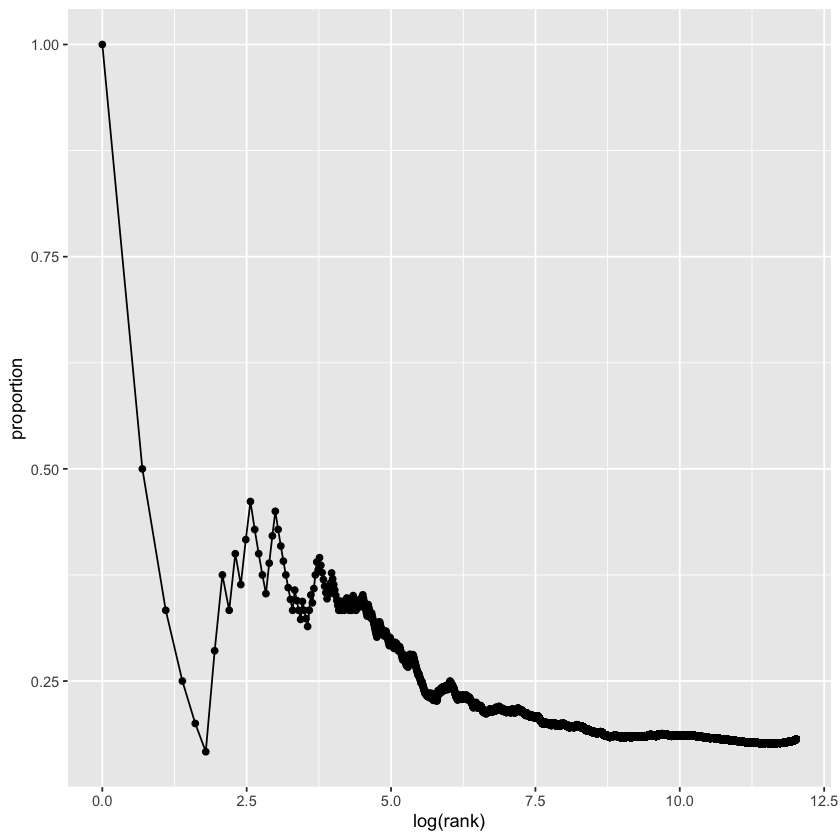

In [14]:
ggplot(res, aes(x = log(rank), y = proportion)) + geom_line() + geom_point()

In [15]:
missing_pred <- fread('missing_pred.csv')
missing_pred$sampleID <- gsub("_NCI60","",missing_pred$sampleID)
head(missing_pred)
nrow(missing_pred)

featureID,sampleID,protein_intensity,measured,id,predprob,missing
<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>
A0AV96;A0AV96-2,X786O,26.95893,1,1,0.9749996,0.025000432
A0AV96;A0AV96-2,A498,28.67702,1,2,0.9915146,0.008485427
A0AV96;A0AV96-2,A549,29.12149,1,3,0.9935983,0.006401712
A0AV96;A0AV96-2,ACHN,29.22591,1,4,0.9940088,0.005991163
A0AV96;A0AV96-2,BT549,24.08905,1,5,0.8618288,0.138171224
A0AV96;A0AV96-2,CAKI1,27.47051,1,6,0.9818415,0.018158472


[1] 418500

In [16]:
overexpressed$ID <- paste0(overexpressed$featureID, overexpressed$sampleID)
missing_pred$id <- paste0(missing_pred$featureID, missing_pred$sampleID)
missing_pred <- missing_pred[!missing_pred$id %in% overexpressed$ID, ]
missing_pred <- missing_pred[,-5]


In [17]:
nrow(missing_pred)


[1] 242707

In [18]:
res_impute <- merge(missing_pred, prot_samp_withRare, by = c('sampleID', 'featureID'), all.x=TRUE)
res_impute[is.na(res_impute$rare)]$rare <- 0
res_impute <- res_impute[order(predprob,-rare),]
head(res_impute)
nrow(res_impute)

sampleID,featureID,protein_intensity,measured,predprob,missing,rare
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
MOLT4,P52895;P52895-2,-4.124682,0,9.311486e-08,0.9999999,0
MOLT4,P00749-2;P00749,3.051918,0,9.113304e-06,0.9999909,1
CCRFCEM,P52895;P52895-2,3.559311,0,1.260132e-05,0.9999874,0
MOLT4,O14910,3.588196,0,1.283595e-05,0.9999872,0
CCRFCEM,P00749-2;P00749,6.287126,0,7.195107e-05,0.9999280,1
CCRFCEM,O14910,6.501264,0,8.249560e-05,0.9999175,0


[1] 242707

In [19]:
res_impute$cumsum <- cumsum(res_impute$rare)
res_impute$rank = 1:nrow(res_impute)
res_impute$proportion <- res_impute$cumsum/res_impute$rank
head(res_impute)

sampleID,featureID,protein_intensity,measured,predprob,missing,rare,cumsum,rank,proportion
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
MOLT4,P52895;P52895-2,-4.124682,0,9.311486e-08,0.9999999,0,0,1,0.0000000
MOLT4,P00749-2;P00749,3.051918,0,9.113304e-06,0.9999909,1,1,2,0.5000000
CCRFCEM,P52895;P52895-2,3.559311,0,1.260132e-05,0.9999874,0,1,3,0.3333333
MOLT4,O14910,3.588196,0,1.283595e-05,0.9999872,0,1,4,0.2500000
CCRFCEM,P00749-2;P00749,6.287126,0,7.195107e-05,0.9999280,1,2,5,0.4000000
CCRFCEM,O14910,6.501264,0,8.249560e-05,0.9999175,0,2,6,0.3333333


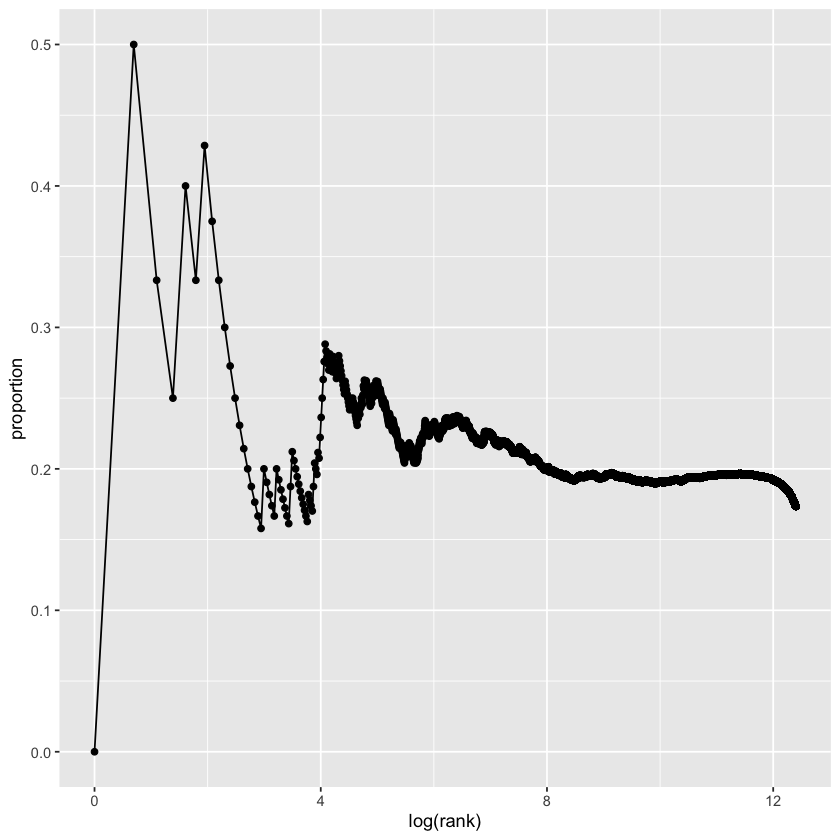

In [20]:
ggplot(res_impute, aes(log(rank), y = proportion)) + geom_line() + geom_point()

In [21]:
res_impute

sampleID,featureID,protein_intensity,measured,predprob,missing,rare,cumsum,rank,proportion
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
MOLT4,P52895;P52895-2,-4.124682,0,9.311486e-08,0.9999999,0,0,1,0.0000000
MOLT4,P00749-2;P00749,3.051918,0,9.113304e-06,0.9999909,1,1,2,0.5000000
CCRFCEM,P52895;P52895-2,3.559311,0,1.260132e-05,0.9999874,0,1,3,0.3333333
MOLT4,O14910,3.588196,0,1.283595e-05,0.9999872,0,1,4,0.2500000
CCRFCEM,P00749-2;P00749,6.287126,0,7.195107e-05,0.9999280,1,2,5,0.4000000
CCRFCEM,O14910,6.501264,0,8.249560e-05,0.9999175,0,2,6,0.3333333
MOLT4,Q9BV36-2,8.121473,0,2.321575e-04,0.9997678,1,3,7,0.4285714
MOLT4,O95833,8.938442,0,3.911348e-04,0.9996089,0,3,8,0.3750000
MOLT4,P29373,9.407305,0,5.276201e-04,0.9994724,0,3,9,0.3333333


In [22]:
colnames(res)[7] <- "Baseline"
colnames(res_impute)[10] <- "withImputedMissingValue"

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 163375 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 240806 rows containing missing values (`geom_line()`).”


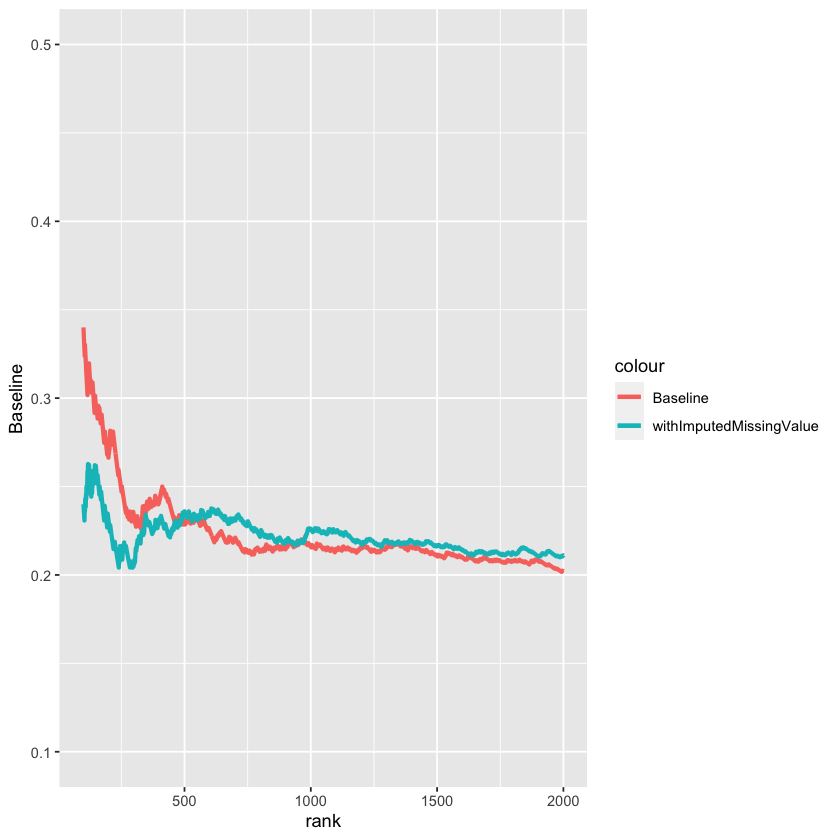

In [23]:
ggplot() + geom_line(data=res, aes(x = rank, y = Baseline, colour = "Baseline"), size = 1.2) +
    geom_line(data=res_impute, aes(x = rank, y = withImputedMissingValue, colour = "withImputedMissingValue"), size = 1.2) +
    xlim(100,2000) + ylim(0.1,0.5)

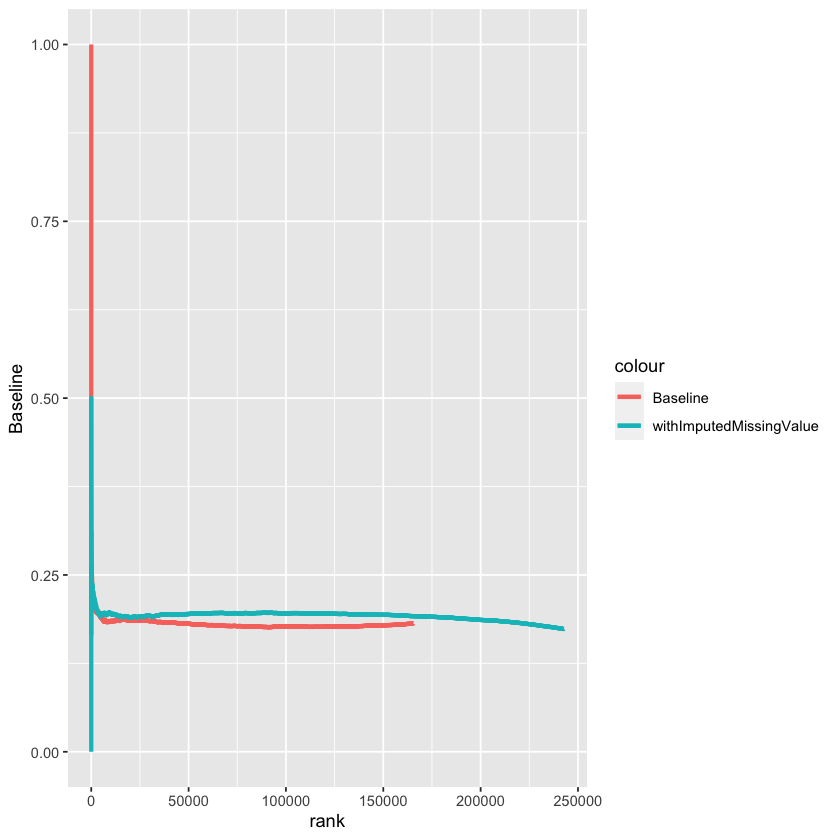

In [24]:
ggplot() + geom_line(data=res, aes(x = rank, y = Baseline, colour = "Baseline"), size = 1.2) +
    geom_line(data=res_impute, aes(x = rank, y = withImputedMissingValue, colour = "withImputedMissingValue"), size = 1.2) 

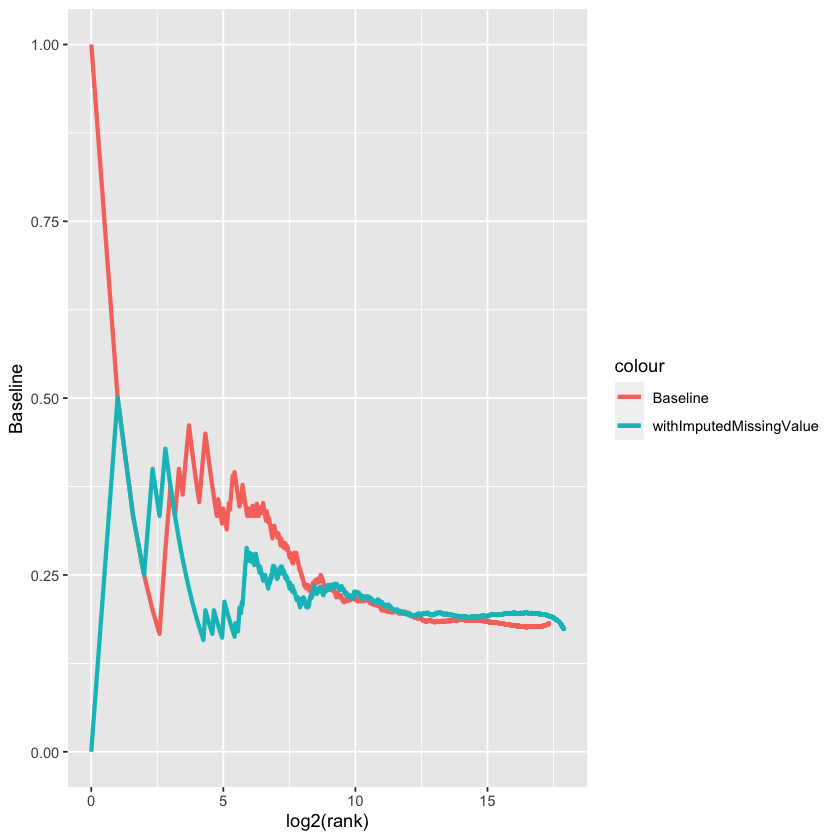

In [25]:
ggplot() + geom_line(data=res, aes(x = log2(rank), y = Baseline, colour = "Baseline"), size = 1.2) +
    geom_line(data=res_impute, aes(x = log2(rank), y = withImputedMissingValue, colour = "withImputedMissingValue"), size = 1.2)# +
    #res_impute, aes(x = log2(rank))

In [26]:
nrow(res_impute)

[1] 242707

In [27]:
nrow(res)

[1] 165276